In [1]:
#importing libraries
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
#Loading the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
#normalizing the images
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [4]:
#Model Develoment
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [5]:
#model training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, batch_size=128)


Epoch 1/20
469/469 [==============================] - 95s 194ms/step - loss: 0.2444 - accuracy: 0.9276
Epoch 2/20
469/469 [==============================] - 88s 188ms/step - loss: 0.0607 - accuracy: 0.9813
Epoch 3/20
469/469 [==============================] - 93s 198ms/step - loss: 0.0426 - accuracy: 0.9863
Epoch 4/20
469/469 [==============================] - 89s 191ms/step - loss: 0.0320 - accuracy: 0.9902
Epoch 5/20
469/469 [==============================] - 88s 188ms/step - loss: 0.0266 - accuracy: 0.9915
Epoch 6/20
469/469 [==============================] - 89s 190ms/step - loss: 0.0219 - accuracy: 0.9932
Epoch 7/20
469/469 [==============================] - 87s 186ms/step - loss: 0.0178 - accuracy: 0.9943
Epoch 8/20
469/469 [==============================] - 88s 188ms/step - loss: 0.0162 - accuracy: 0.9947
Epoch 9/20
469/469 [==============================] - 93s 198ms/step - loss: 0.0142 - accuracy: 0.9955
Epoch 10/20
469/469 [==============================] - 92s 195ms/step - l

In [6]:
#Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0376 - accuracy: 0.9918
0.9918000102043152


In [7]:
import numpy as np
pred = model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


In [8]:
print(np.argmax(pred[9]))

9


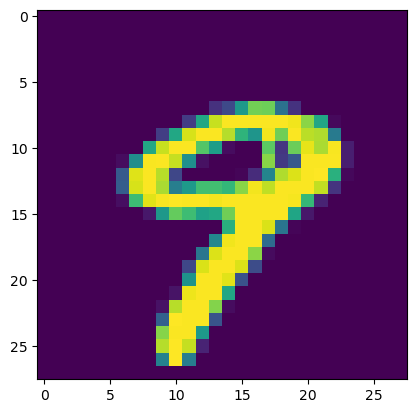

In [9]:
import matplotlib.pyplot as plt
plt.imshow(test_images[9])

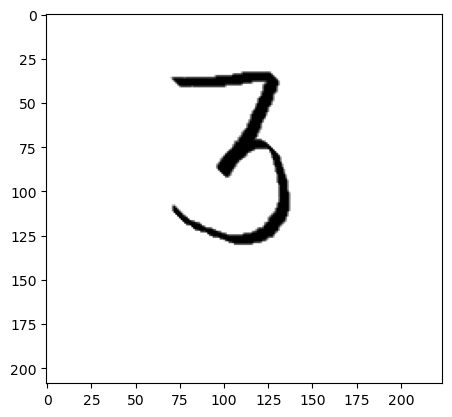

In [17]:
import cv2
img = cv2.imread('three.png')
plt.imshow(img)

In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(209, 224)

In [19]:
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
resized.shape

(28, 28)

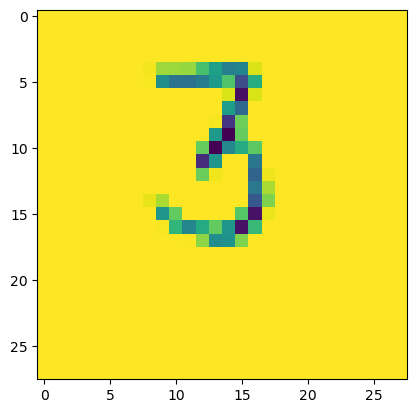

In [21]:
plt.imshow(resized)

In [13]:
import tensorflow as tf
newimg = tf.keras.utils.normalize(resized,axis=1)

In [14]:
newimg = np.array(newimg).reshape(-1,28,28,1)
newimg.shape

(1, 28, 28, 1)

In [15]:
pred_1 = model.predict(newimg)
print(np.argmax(pred_1[0]))

1/1 [==============================] - 0s 24ms/step
4


In [22]:
model.save('mnist.h5')

In [23]:
#Creating the GUI Window For Prediction 
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

1/1 [==============================] - 0s 19ms/step
